In [22]:
"""This notebook illustrates how to look at the data created by the test in tfutils/tests/test.py:test_training

To use this, you first have to run the testsin that file:

    CUDA_VISIBLE_DEVICES=0 nosetests -s tfutils/tests/test.py
    
which will create records in the database. 

Then you can execute the commands in this notebook and see what's happening.   
    
""";

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import pymongo as pm
import numpy as np
import scipy.signal as signal

In [2]:
import pymongo as pm
conn = pm.MongoClient(port=29101)

In [3]:
conn.database_names()

[u'erroropt-imnet_test',
 u'erroropt-vgg_test_vgg_obj_trainval2___RECENT',
 u'erroropt-vgg_test_vgg_obj_corrval2___RECENT',
 u'erroropt-vgg_test_vgg_obj_corrtest1___RECENT',
 u'erroropt-vgg_test_vgg_obj_trainval1___RECENT',
 u'erroropt-vgg_test_vgg_obj_corrtest12___RECENT',
 u'alexnet-3dworld',
 u'erroropt-vgg_test_vgg_obj_alltrain1___RECENT',
 u'erroropt-vgg_test_vgg_obj_corrval0___RECENT',
 u'erroropt-vgg_test_vgg_obj_corrtest10___RECENT',
 u'erroropt-vgg_test_vgg_obj_corrtest4___RECENT',
 u'erroropt-vgg_test_vgg_obj_corrval4___RECENT',
 u'erroropt-vgg_test_vgg_obj_trainval0___RECENT',
 u'erroropt-vgg_test_vgg_obj_trainval3___RECENT',
 u'alexnet-imnet',
 u'erroropt-vgg_test_vgg_obj_corrtest15___RECENT',
 u'erroropt-vgg_test_vgg_obj_corrtest2___RECENT',
 u'erroropt-vgg_test_vgg_obj_corrtest0___RECENT',
 u'erroropt-vgg_test_vgg_obj_corrval1___RECENT',
 u'erroropt-vgg_test_vgg_obj_corrtest3___RECENT',
 u'erroropt-vgg_test_vgg_obj_corrtest7___RECENT',
 u'erroropt-vgg_test_vgg_obj_corrtes

In [4]:
coll = conn['tfutils-test']['testcol.files']

In [5]:
coll.distinct('exp_id')

[u'validation1', u'training0', u'validation0', u'training1']

In [6]:
coll.find({'exp_id': 'training0'}).count()

51

In [9]:
r = coll.find({'exp_id': 'training0', 'step': 0})[0]

In [15]:
train_vec = np.concatenate([[(_r['loss'], _r['learning_rate']) for _r in r['train_results']] 
                            for r in conn['tfutils-test']['testcol.files'].find(
                                       {'exp_id': 'training0', 'train_results': {'$exists': True}},
        projection=['train_results'])])


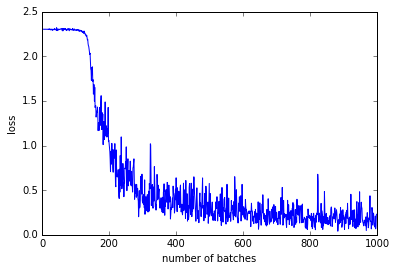

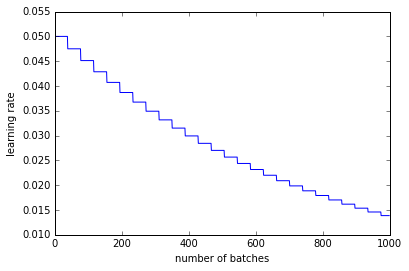

In [21]:
plt.plot(train_vec[:, 0])
plt.xlabel('number of batches')
plt.ylabel('loss')

plt.figure()
plt.plot(train_vec[:, 1])
plt.xlabel('number of batches')
plt.ylabel('learning rate')

In [19]:
train_vec

array([[ 2.30256367,  0.05      ],
       [ 2.30250454,  0.05      ],
       [ 2.30253649,  0.05      ],
       ..., 
       [ 0.10421684,  0.01386947],
       [ 0.22150579,  0.01386947],
       [ 0.2298585 ,  0.01386947]])